<h2>Комп'ютерний практикум з обробки біомедичних даних</h2>
<h3>за темою: КРИТЕРІЙ ПІРСОНА ДЛЯ ПОРІВНЯННЯ ДЕКІЛЬКОЇ ГРУП ЗА РОЗПОДІЛЕННЯМ ОЗНАКИ </h3>
<h3>студентки групи БС-81</h3>
<h3>Кисельової Ірини</h3>

<h3><mark>Завдання</mark></h3>

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.

In [40]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


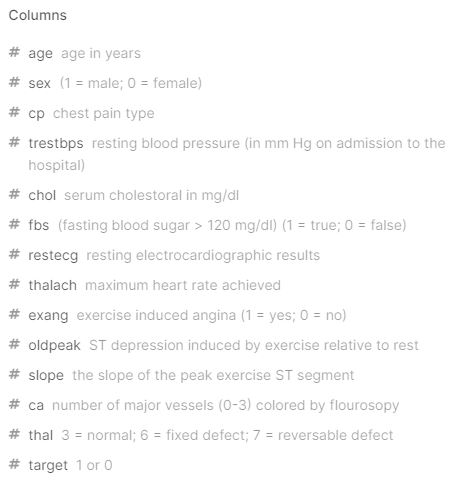

In [103]:

expData = data[['age', 'fbs', 'sex']]

expData.sort_values('age', ascending=False)

younger45men = expData.loc[(expData['age'] <= 45) & (expData['sex'] == 1) &  (expData['fbs'] == 1)]
from45to50men = expData.loc[(expData['age'] > 45) & (expData['age'] <= 50) & (expData['sex'] == 1) & (expData['fbs'] == 1)]
from50to60men = expData.loc[(expData['age'] > 50) & (expData['age'] <= 60) & (expData['sex'] == 1) & (expData['fbs'] == 1)]
older60men = expData.loc[(expData['age'] > 60) & (expData['sex'] == 1) & (expData['fbs'] == 1)]
younger45women = expData.loc[(expData['age'] <= 45) & (expData['sex'] == 0) &  (expData['fbs'] == 1)]
from45to50women = expData.loc[(expData['age'] > 45) & (expData['age'] <= 50) &(expData['sex'] == 0) & (expData['fbs'] == 1)]
from50to60women = expData.loc[(expData['age'] > 50) & (expData['age'] <= 60) & (expData['sex'] == 0) & (expData['fbs'] == 1)]
older60women = expData.loc[(expData['age'] > 60) & (expData['sex'] == 0) & (expData['fbs'] == 1)]

d = {'age':['younger45', 'from45to50', 'from50to60', 'older60'], 'men':[len(younger45men), len(from45to50men), len(from50to60men), len(older60men)], 'women':[len(younger45women),
     len(from45to50women), len(from50to60women), len(older60women)]}
expData = pd.DataFrame(data = d)
expData



,age,men,women
0,younger45,2,1
1,from45to50,3,0
2,from50to60,19,7
3,older60,9,4


In [105]:
from scipy.stats import pearsonr
keys = expData.keys().tolist()
stat, p = pearsonr(expData[keys[1]], expData[keys[2]])
print(expData[keys[1]], expData[keys[2]])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.01:
	print('Probably independent')
else:
	print('Probably dependent')

0     2
1     3
2    19
3     9
Name: men, dtype: int64 0    1
1    0
2    7
3    4
Name: women, dtype: int64
stat=0.972, p=0.028
Probably independent


В таблице указывается `уровень сахара в крови`
натощак у мужчин и женщин разного возраста

2. Побудувати графік, що відображає розподіл ознак в групах.

Text(0.5, 1.0, 'LEVEL Of GLUCOSE IN BLOOD')

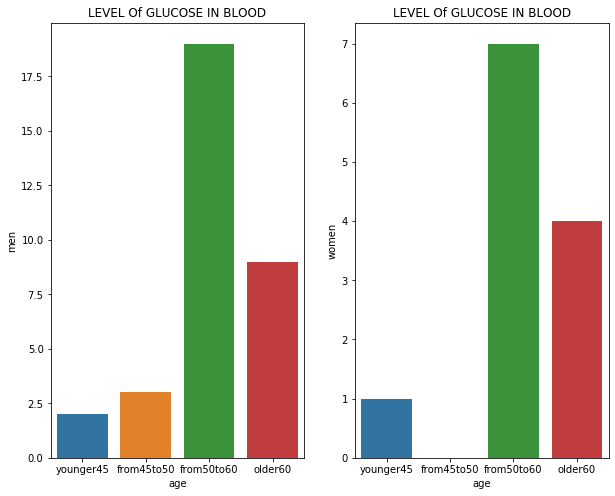

In [92]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,8))
sns.boxplotg = sns.barplot(x="age", y="men", data= expData, ax=ax1)
sns.barplot(x="age", y="women", data= expData, ax=ax2)
ax1.set_title('LEVEL Of GLUCOSE IN BLOOD')
ax2.set_title('LEVEL Of GLUCOSE IN BLOOD')

3. Написати функції, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї. Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною.

Вважаємо, що друга група експериментальна, а перша - теоретична.

In [106]:
def is_significant(data,significant_level): 
    # get keys.
    keys = data.keys().tolist()
    keys.extend(['(ni-ni`)^2', '((ni-ni`)^2)/ni`'])
    group1_sum = sum(data[keys[1]]) 
    group2_sum = sum(data[keys[2]]) 

    # caculate n_d.
    if(group1_sum != group2_sum): 
        n_d = [] 
        
        for i in data[keys[1]]:
            n_d.append((((i * 100)/group1_sum)*group2_sum)/100)
            
        data[keys[1]] = n_d  
        
    # caculate (ni-ni`)^2 and ((ni-ni`)^2)/ni`.
    for row in data.itertuples():
        data.at[row.Index, keys[3]] = (data.at[row.Index, keys[1]]-data.at[row.Index, keys[2]])**2
        data.at[row.Index, keys[4]] = data.at[row.Index, keys[3]]/data.at[row.Index, keys[1]]
        
    # caculate ch_pirson.
    ch_pirson = pd.read_excel("valuesPearson.xlsx").iloc[
        len(data)-1, 1 if (significant_level == 0.01) else 2
    ]
    
    # caculate ch_em.
    ch_em = sum(data[keys[4]])
    print(ch_em)
    print(ch_pirson)
    # return the result.
    return ch_em > ch_pirson
           

expData

1.3559941520467838
11.3
False


,age,men,women,(ni-ni`)^2,((ni-ni`)^2)/ni`
0,younger45,0.727273,1,0.074380,0.102273
1,from45to50,1.090909,0,1.190083,1.090909
2,from50to60,6.909091,7,0.008264,0.001196
3,older60,3.272727,4,0.528926,0.161616


4) Перевірити розбіжність на між групами на даних з п. 1. В результаті сформувати таблицю спряженості. Додати до таблиці стовбчики з відсотковим розподілом по градаціям всередині груп. Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами).

In [107]:
menSum = sum([x for x in expData['men']])
womenSum = sum([x for x in expData['women']])
percentsM = [(part/menSum)*100 for part in expData['men']]
percentsW = [(part/womenSum)*100 for part in expData['women']]

expData.insert(5, 'men  %', percentsM)
expData.insert(6, 'women  %', percentsW)

expData

,age,men,women,(ni-ni`)^2,((ni-ni`)^2)/ni`,men %,women %
0,younger45,0.727273,1,0.074380,0.102273,6.060606,8.333333
1,from45to50,1.090909,0,1.190083,1.090909,9.090909,0.000000
2,from50to60,6.909091,7,0.008264,0.001196,57.575758,58.333333
3,older60,3.272727,4,0.528926,0.161616,27.272727,33.333333


In [109]:
result = pd.DataFrame ( 
    [is_significant(expData, 0.01), is_significant(expData, 0.05)],
    index=["0.01", "0.05"],
    columns=["Is significant"]
)
result.index.name = "Level"
result

1.3559941520467838
11.3
1.3559941520467838
7.8


,Is significant
Level,
0.01,False
0.05,False
